In [67]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import math
from typing import List, Tuple, Union, Optional
from collections import defaultdict
import torch

# Problem 1

We have $$\bar{X}(N) = \frac{1}{N} \sum_{i=1}^N X_i, \quad X_i \sim \mathrm{Uniform}(0, 1)$$
and $$\hat{X}(N) = \text{median}(X_1, \dots, X_N), \quad X_i \sim \mathrm{Uniform}(0, 1)\;.$$

We analytically derived that both estimates should converge to $0.5$. However, because we observed two different variance convergence rates, we now wish to empirically verify the dervied convergence rate. 

In [2]:
# seed the generator
SEED = 42
np.random.seed(SEED)

NUM_RUNS = 50
NUM_SAMPLES = 1000

In [3]:
def X_bar(_X):
    return np.mean(_X)

def X_hat(_X):
    return np.median(_X)

### $\bar{X}(N)$

In [4]:
# seed the generator
np.random.seed(SEED)

run_results = []

for run in range(NUM_RUNS):
    X = np.random.uniform(0, 1, size=NUM_SAMPLES)
    run_result = []

    for N in range(1, NUM_SAMPLES+1):
        X_bar_estimate = X_bar(X[:N])
        run_result.append(X_bar_estimate)
    
    run_results.append(run_result)

run_results = np.array(run_results)
run_results.shape

(50, 1000)

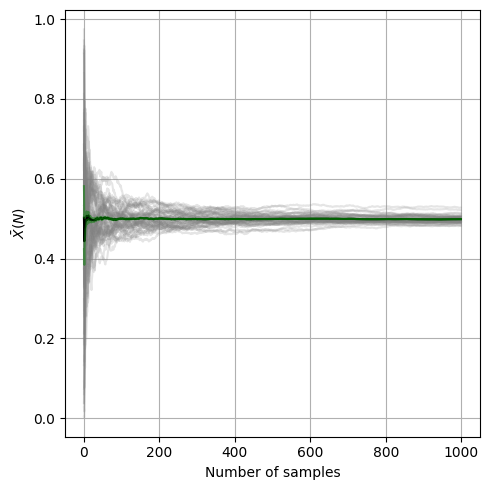

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

# compute the mean of all runs
means = np.mean(run_results, axis=0)

# compute the variance of all runs
variances = np.var(run_results, axis=0)
# print(variances.shape)

# plot the individual runs
for rid in range(run_results.shape[0]):
    ax.plot(run_results[rid], label=f'Run', c='gray', alpha=0.2)

ax.plot(means, label='Mean', c='black')
ax.plot(means+variances, label='Variance', c='green', alpha=0.5)
ax.plot(means-variances, label='Variance', c='green', alpha=0.5)

ax.set_xlabel('Number of samples')
ax.set_ylabel('$\\bar{X}(N)$')
ax.grid(True)

fig.tight_layout()

/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_51061/2464779465.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1)


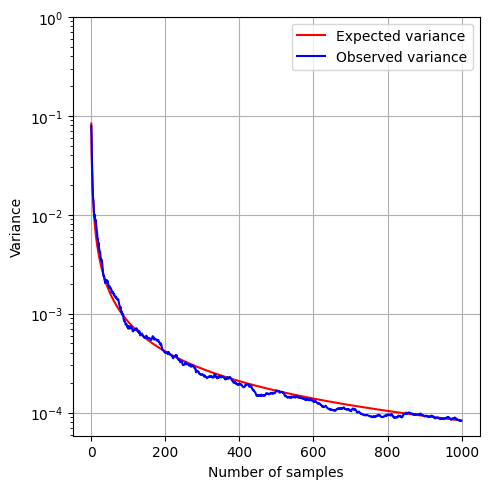

In [6]:
X = np.linspace(1, NUM_SAMPLES, NUM_SAMPLES) * 12.0
X = 1.0 / X

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X, label='Expected variance', c='red')
ax.plot(variances, label='Observed variance', c='blue')
ax.legend()

ax.grid(True)
ax.set_xlabel('Number of samples')
ax.set_ylabel('Variance')

ax.set_yscale('log')
ax.set_ylim(0, 1)

fig.tight_layout()


In [7]:
means_bar = means.copy()
expected_variance_bar = X.copy()
variance_bar = variances.copy()

### $\hat{X}(N)$

In [8]:
# seed the generator
np.random.seed(SEED)

run_results = []

for run in range(NUM_RUNS):
    X = np.random.uniform(0, 1, size=NUM_SAMPLES)
    run_result = []

    for N in range(1, NUM_SAMPLES+1):
        X_bar_estimate = X_hat(X[:N])
        run_result.append(X_bar_estimate)
    
    run_results.append(run_result)

run_results = np.array(run_results)
run_results.shape

(50, 1000)

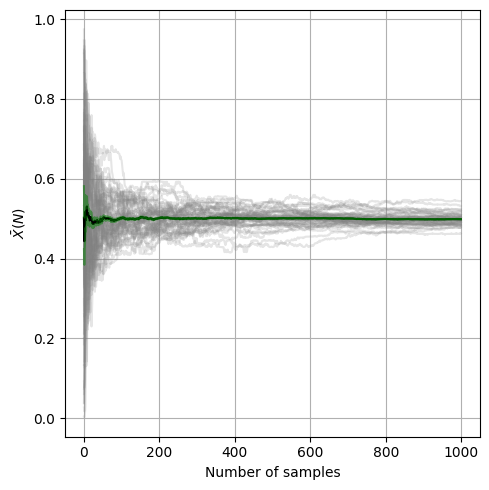

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

# compute the mean of all runs
means = np.mean(run_results, axis=0)

# compute the variance of all runs
variances = np.var(run_results, axis=0)
# print(variances.shape)

# plot the individual runs
for rid in range(run_results.shape[0]):
    ax.plot(run_results[rid], label=f'Run', c='gray', alpha=0.2)

ax.plot(means, label='Mean', c='black')
ax.plot(means+variances, label='Variance', c='green', alpha=0.5)
ax.plot(means-variances, label='Variance', c='green', alpha=0.5)

ax.set_xlabel('Number of samples')
ax.set_ylabel('$\\bar{X}(N)$')
ax.grid(True)

fig.tight_layout()

/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_51061/2958123404.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1)


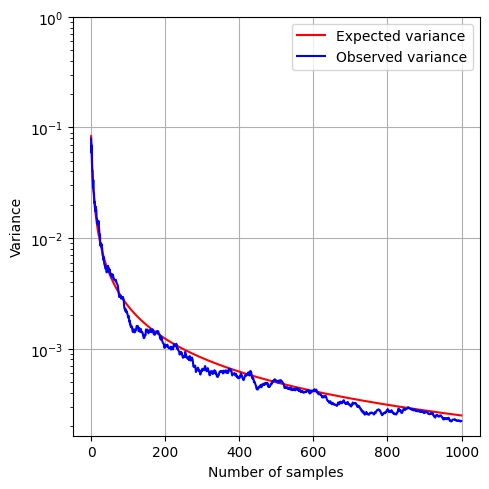

In [10]:
X = np.linspace(1, NUM_SAMPLES, NUM_SAMPLES) * 4
X += 8.0
X = 1.0 / X

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X, label='Expected variance', c='red')
ax.plot(variances, label='Observed variance', c='blue')
ax.legend()

ax.grid(True)
ax.set_xlabel('Number of samples')
ax.set_ylabel('Variance')

ax.set_yscale('log')
ax.set_ylim(0, 1)

fig.tight_layout()


In [11]:
means_hat = means.copy()
expected_variance_hat = X.copy()
variance_hat = variances.copy()

### Compare

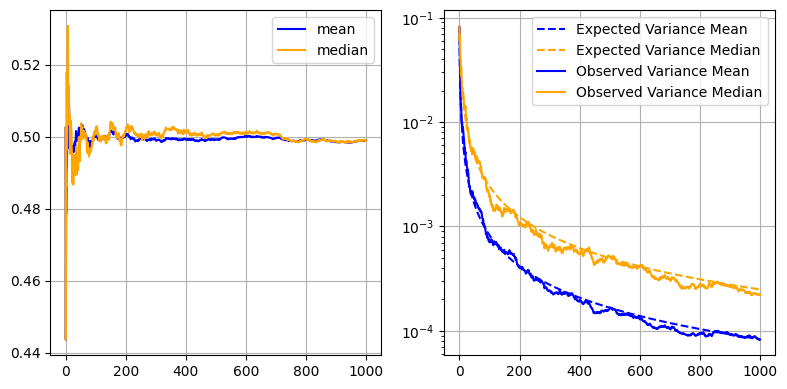

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))


ax[0].plot(means_bar, label="mean", c='blue',)
ax[0].plot(means_hat, label="median", c='orange')

ax[0].legend()
ax[0].grid(True)

ax[1].plot(expected_variance_bar, label="Expected Variance Mean", c='blue', linestyle='--')
ax[1].plot(expected_variance_hat, label="Expected Variance Median", c='orange', linestyle='--')
ax[1].plot(variance_bar, label="Observed Variance Mean", c='blue')
ax[1].plot(variance_hat, label="Observed Variance Median", c='orange')


ax[1].legend()
ax[1].grid(True)

# log y axis
ax[1].set_yscale('log')
fig.tight_layout()


**Remark**

We clearly observe that the observed variances match the equations that we derived analytically. Furthermore, We clearly observe, that the mean estimation has a better estimation of the expectation of $X$, as not only are the means higher in the median estimator, but the variance of the mean estimator is also lower than the median estimator

## Test

In [13]:
P_B = np.array([
    [0.0,   0.095, 0.905],
    [0.255, 0.0,   0.745],
    [0.745, 0.255, 0.0]
])
P_A = np.array([
    [0.0,   0.495, 0.505],
    [0.505, 0.0,   0.495],
    [0.495, 0.505, 0.0]
])
P_square = P_B @ P_B
# P.dot(P)
P_ABB = P_A @ P_B @ P_B
pi = np.array([1.0, 1.0, 1.0]) / 3.0
true_pi = np.array([0.4429338863, 0.1743405141, 0.3827255994])
pi_A = true_pi @ P_A
pi_AB = pi_A @ P_B
pi_ABB = pi_AB @ P_B
pi_ABB 

array([0.44293388, 0.17434051, 0.38272561])

In [14]:
# steps = 1000
# for step in range(steps):
#     pi = pi @ P_ABB_conv

# print(pi)

# Problem 2
## (c)

In [15]:
## Monte Carlo
class Environment:
    def __init__(self, capital: int = 1):
        self.capital: int = capital
        self.state: int = None

        self.compute_state()

    def compute_state(self):
        self.state = self.capital % 3

    def step(self) -> int:
        if self.state == 0:
            if np.random.rand() <= 0.095:
                self.capital += 1
            else:
                self.capital -= 1
        else:
            if np.random.rand() <= 0.745:
                self.capital += 1
            else:
                self.capital -= 1

        self.compute_state()

        return self.capital

In [16]:
NUM_STEPS = 1000

CAPITAL_RANGE = range(1, 31)

np.random.seed(SEED)
all_deltas = []
for run in range(NUM_RUNS):
    for capital in CAPITAL_RANGE:
        env = Environment(capital=capital)

        deltas = []

        for step in range(NUM_STEPS):
            new_capital = env.step()

            delta = new_capital - capital
            deltas.append(delta)

        all_deltas.append(deltas)

all_deltas = np.array(all_deltas)
all_deltas.shape


(1500, 1000)

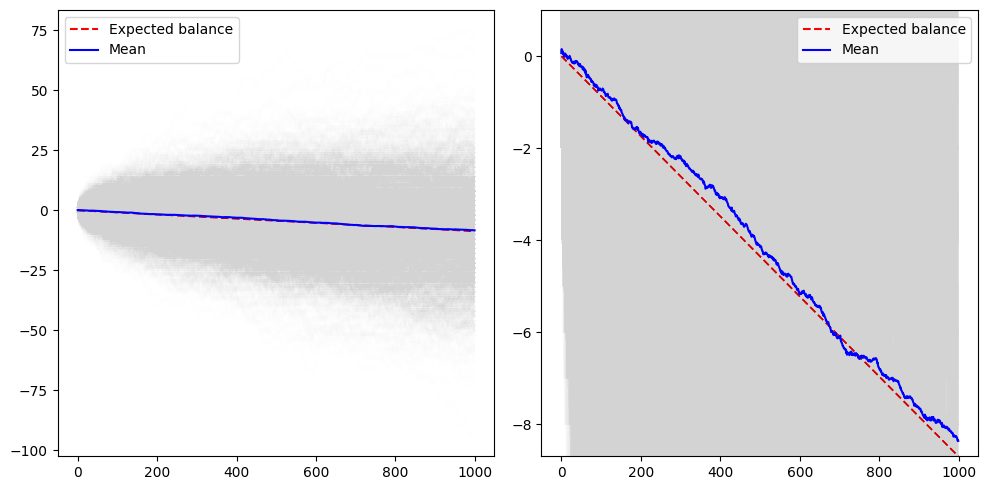

In [17]:
expected_delta = np.linspace(0, NUM_STEPS, NUM_STEPS) * (-0.0086952867)

# min_offset = min(np.min(all_deltas), np.min(expected_delta))

means = np.mean(all_deltas, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
ax[1].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
for run in range(all_deltas.shape[0]):
    ax[0].plot(all_deltas[run], c='lightgray', alpha=0.002)
    ax[1].plot(all_deltas[run], c='lightgray', alpha=0.002)

ax[0].plot(means, label="Mean", c='blue')
ax[1].plot(means, label="Mean", c='blue')

# zoom in on the y axis
ax[1].set_ylim(expected_delta.min(), 1)

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper right")

fig.tight_layout()


### (d)

In [18]:
## Monte Carlo
class EnvironmentCombined:
    def __init__(self, capital: int = 1):
        self.capital: int = capital
        self.state: int = None

        self.compute_state()

    def compute_state(self):
        self.state = self.capital % 3

    def step(self) -> int:
        if self.state == 0:
            if np.random.rand() <= 0.295:
                self.capital += 1
            else:
                self.capital -= 1
        else:
            if np.random.rand() <= 0.62:
                self.capital += 1
            else:
                self.capital -= 1

        self.compute_state()

        return self.capital

In [19]:
NUM_STEPS = 1000

CAPITAL_RANGE = range(1, 31)

np.random.seed(SEED)
all_deltas = []
for run in range(NUM_RUNS):
    for capital in CAPITAL_RANGE:
        env = EnvironmentCombined(capital=capital)

        deltas = []

        for step in range(NUM_STEPS):
            new_capital = env.step()

            delta = new_capital - capital
            deltas.append(delta)

        all_deltas.append(deltas)

all_deltas = np.array(all_deltas)
all_deltas.shape


(1500, 1000)

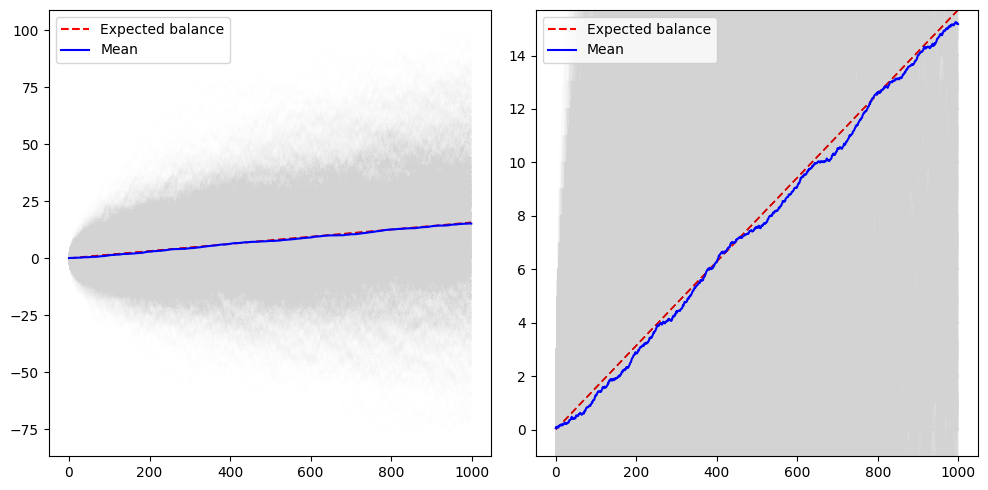

In [20]:
expected_gain_each_step = 0.01570422535
expected_delta = np.linspace(0, NUM_STEPS, NUM_STEPS) * expected_gain_each_step

min_offset = min(np.min(all_deltas), np.min(expected_delta))

means = np.mean(all_deltas, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
ax[1].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
for run in range(all_deltas.shape[0]):
    ax[0].plot(all_deltas[run], c='lightgray', alpha=0.002)
    ax[1].plot(all_deltas[run], c='lightgray', alpha=0.002)

ax[0].plot(means, label="Mean", c='blue')
ax[1].plot(means, label="Mean", c='blue')

# zoom in on the y axis
ax[1].set_ylim(-1, expected_delta.max())

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")

fig.tight_layout()


### (e)

In [21]:
## Monte Carlo
class EnvironmentABB:
    def __init__(self, capital: int = 1):
        self.capital: int = capital
        self.state: int = None
        self.steps: int = 0

        self.compute_state()

    def compute_state(self):
        self.state = self.capital % 3

        if self.steps > 2:
            self.steps = 0


    def step(self) -> int:
        # Play game A
        if self.steps == 0:
            if np.random.rand() <= 0.495:
                self.capital += 1
            else:
                self.capital -= 1

        # play game B
        else:
            if self.state == 0:
                if np.random.rand() <= 0.095:
                    self.capital += 1
                else:
                    self.capital -= 1
            else:
                if np.random.rand() <= 0.745:
                    self.capital += 1
                else:
                    self.capital -= 1


        self.steps += 1

        self.compute_state()

        return self.capital

In [22]:
NUM_STEPS = 1000

CAPITAL_RANGE = range(1, 31)

np.random.seed(SEED)
all_deltas = []
for run in range(NUM_RUNS):
    for capital in CAPITAL_RANGE:
        env = EnvironmentABB(capital=capital)

        deltas = []

        for step in range(NUM_STEPS):
            new_capital = env.step()

            delta = new_capital - capital
            deltas.append(delta)

        all_deltas.append(deltas)

all_deltas = np.array(all_deltas)
all_deltas.shape


(1500, 1000)

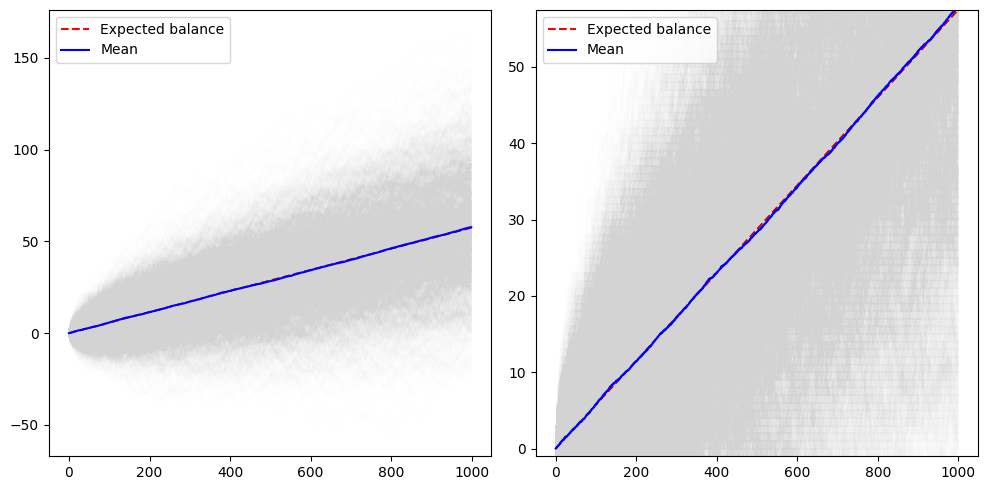

In [23]:
# This could be also computed for each round, yielding a better local expected gain. 
# However, after three rounds, both are equivalent. 
# Furthermore, on the scale on which we compute the reward, we doubt that it makes a significant difference.
expected_gain_each_step = 0.172292479/3.0  
expected_delta = np.linspace(0, NUM_STEPS, NUM_STEPS) * expected_gain_each_step

min_offset = min(np.min(all_deltas), np.min(expected_delta))

means = np.mean(all_deltas, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
ax[1].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
for run in range(all_deltas.shape[0]):
    ax[0].plot(all_deltas[run], c='lightgray', alpha=0.002)
    ax[1].plot(all_deltas[run], c='lightgray', alpha=0.002)

ax[0].plot(means, label="Mean", c='blue')
ax[1].plot(means, label="Mean", c='blue')

# zoom in on the y axis
ax[1].set_ylim(-1, expected_delta.max())

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")

fig.tight_layout()


# Problem 3

### (a)

In [24]:
df = pd.read_csv('./human.csv')
df.head(5)

,sequence,annotations
0,MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...,0011111111111111111111100000000000000000000000...
1,MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...,0000111111111111111111111000000000000000000000...
2,MRWQEMGYIFYPRKLR,0000000000000000
3,MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...,0000000000000000000000000000000000000000000000...
4,MGDQPCASGRSTLPPGNAREAKPPKKRCLLAPRWDYPEGTPNGGST...,0000000000000000000000000000000000000000000000...


In [25]:
def protein_to_int(string: str) -> [int]:
    return [ord(c) - ord('A') for c in string]

def label_to_int(string: str) -> [int]:
    return [int(c) for c in string]

In [26]:
# map the sequences to integers
df['sequence'] = df['sequence'].apply(protein_to_int)
df['annotations'] = df['annotations'].apply(label_to_int)

In [27]:
# split into train and test set (80/20)
df_shuffle = df.sample(frac=1).reset_index(drop=True)

split_index = int(len(df_shuffle) * 0.8)
df_train = df_shuffle.iloc[:split_index]
df_test = df_shuffle.iloc[split_index:]

df_train.shape, df_test.shape

((14767, 2), (3692, 2))

In [28]:
class HiddenMarkovModel:
    def __init__(self, num_hidden_states: int, num_observed_states: int):
        self.num_states_hidden: int = num_hidden_states
        self.num_states_observed: int = num_observed_states

        self.hidden_state: int | None = None
        self.observed_state: int | None = None
        self.pi: np.ndarray = None

        self.transition_matrix: np.ndarray = None


class MonteCarloHDD(HiddenMarkovModel):
    def __init__(self, num_hidden_states: int, num_observed_states: int):
        super().__init__(num_hidden_states, num_observed_states)

        self.transition_matrix = np.zeros((self.num_states_hidden, self.num_states_hidden), dtype=np.float64)
        self.emission_matrix = np.zeros((self.num_states_hidden, self.num_states_observed), dtype=np.float64)
        self.pi = np.zeros(self.num_states_hidden, dtype=np.float64)

    def learn_step(self, hidden_state: int, observed_state: int):
        # increment the number of observations
        if self.hidden_state is not None:
            self.transition_matrix[self.hidden_state, hidden_state] += 1    
        else:
            self.pi[hidden_state] += 1    
        self.emission_matrix[hidden_state, observed_state] += 1

        self.hidden_state = hidden_state
        self.observed_state = observed_state

    def reset_sequence(self):
        self.hidden_state = None
        self.observed_state = None

    def formalize_probabilities(self):
        transition_matrix_sum_rows = np.sum(self.transition_matrix, axis=1)
        for row in range(len(transition_matrix_sum_rows)):
            self.transition_matrix[row, :] = self.transition_matrix[row, :] / transition_matrix_sum_rows[row]

        emission_matrix_sum_rows = np.sum(self.emission_matrix, axis=1)
        for row in range(len(emission_matrix_sum_rows)):
            self.emission_matrix[row, :] = self.emission_matrix[row, :] / emission_matrix_sum_rows[row]

        self.pi = self.pi / np.sum(self.pi)



In [29]:
alphabet = set()

for index, row in tqdm(df_train.iterrows(), total=len(df_train), desc="Computing mapping of alphabet to integer"):
    for state in row['sequence']:
        alphabet.add(state)
        
alphabet = list(alphabet)
alphabet.sort()
alphabet_mapping = {state: i for i, state in enumerate(alphabet)}
alphabet, len(alphabet)

Computing mapping of alphabet to integer: 100%|██████████| 14767/14767 [00:00<00:00, 51144.14it/s]


([0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 24],
 21)

In [30]:
# feed the data
MC_HMM = MonteCarloHDD(num_hidden_states=2, num_observed_states=21)

for index, row in tqdm(df_train.iterrows(), total=len(df_train), desc="Estimating the parameters of the Hidden Markov Model"):
    # ensure that the sequence is reset
    MC_HMM.reset_sequence()

    for step in range(len(row['sequence'])):
        # print(row['sequence'][step], row['annotations'][step])
        MC_HMM.learn_step(observed_state=alphabet_mapping[row['sequence'][step]], hidden_state=row['annotations'][step])

MC_HMM.formalize_probabilities()

Estimating the parameters of the Hidden Markov Model: 100%|██████████| 14767/14767 [00:10<00:00, 1471.13it/s]


In [31]:
MC_HMM.transition_matrix, MC_HMM.emission_matrix, MC_HMM.pi

(array([[0.99832151, 0.00167849],
        [0.04647815, 0.95352185]]),
 array([[6.92669017e-02, 2.23936979e-02, 4.92535073e-02, 7.39929258e-02,
         3.40816938e-02, 6.58905677e-02, 2.67159356e-02, 4.09576305e-02,
         5.92171870e-02, 9.53739645e-02, 2.05869616e-02, 3.65882784e-02,
         6.45684715e-02, 4.90439625e-02, 5.81043945e-02, 8.45869269e-02,
         5.38760242e-02, 2.40994575e-06, 5.75039565e-02, 1.17032990e-02,
         2.62913032e-02],
        [9.52731606e-02, 2.75704407e-02, 8.26075605e-03, 9.90085754e-03,
         9.30841272e-02, 7.07653584e-02, 9.77701314e-03, 1.00655371e-01,
         8.26745035e-03, 1.96233122e-01, 3.22564449e-02, 1.69867654e-02,
         2.61914166e-02, 1.18589379e-02, 9.77031885e-03, 5.91039021e-02,
         4.90992830e-02, 0.00000000e+00, 1.16571050e-01, 2.19639713e-02,
         3.64102530e-02]]),
 array([0.99864563, 0.00135437]))

### (b)

In [32]:
# Based on the code presented in the lecture
def viterbi_max_x(
    y: [int],          
    HMM: HiddenMarkovModel               
) -> (float, [int]):
    N = len(HMM.transition_matrix)
    T = len(y)
    # print("N:", N, "T:", T)
    
    # transform to log space (add small epsilon to avoid log(0))
    epsilon = 1e-300  # Very small value to avoid log(0) warnings
    log_transition_matrix = np.log(np.maximum(HMM.transition_matrix, epsilon))
    log_emission_matrix = np.log(np.maximum(HMM.emission_matrix, epsilon))
    log_pi = np.log(np.maximum(HMM.pi, epsilon))
    logDelta = [[-math.inf] * N for _ in range(T)]

    # initialisation
    for j in range(N):
        logDelta[0][j] = log_pi[j] + log_emission_matrix[j][y[0]]
    
    # recursion (Forward)
    for t in range(1, T):
        for j in range(N):
            best = max(logDelta[t-1][i] + log_transition_matrix[i][j] for i in range(N))    
            logDelta[t][j] = best + log_emission_matrix[j][y[t]]

    logDelta = np.array(logDelta)
    # print(logDelta)

    # backtracking (backwards)
    logDelta_difference = np.zeros_like(logDelta) 
    logDelta_difference[:-1] = logDelta[1:]
    logDelta_difference =  logDelta_difference - logDelta

    # print(logDelta_difference)
    # print(np.concatenate([logDelta, logDelta_difference], axis=1)[-10:])

    # print("A:")
    # print(log_transition_matrix)

    current_state = np.argmax(logDelta[T-1]).item()
    output_state_sequence = [current_state]
    # print('initial state', current_state)
    for t in range(T-1, 0, -1):
        
        # get the most likely previous state
        # print("logDelta[T-1]", logDelta[t])
        # print(f"t={t}, current_state={current_state}")

        # print('logDelta[t-1]:', logDelta[t-1])
        # for state in range(N):
        #     print(f"state={state}")
        #     most_likely_previous_state = np.argmax(log_transition_matrix.T[state] + logDelta[t-1])

        #     print(f'\tA.T[state]:', log_transition_matrix.T[state])
        #     print('\tlog_transition_matrix.T[current_state] + logDelta[t-1]:', log_transition_matrix.T[state] + logDelta[t-1])
        #     print("\tmost_likely_previous_state:", most_likely_previous_state)
        #     print('\tEmission matrix:', log_emission_matrix[:, y[t]])
        most_likely_previous_state = np.argmax(log_transition_matrix.T[current_state] + logDelta[t-1]).item()
        # print('log_transition_matrix.T[current_state] + logDelta[t-1]:', log_transition_matrix.T[current_state] + logDelta[t-1])
        # print("most_likely_previous_state:", most_likely_previous_state)
        # print('Emission matrix:', log_emission_matrix[:, y[t]])

        current_state = most_likely_previous_state
        output_state_sequence.append(current_state)

        # print('Emission matrix:', log_transition_matrix.T[current_state] + logDelta[t-1] + log_emission_matrix[j][y[t]])
        # for state in range(N):
        #     print('State:', state)
        #     print(f'\tb_x(State={state}) = {log_emission_matrix[state][y[t]]}')
        #     print(f'\tmax(State={state}) = {np.max(logDelta[t-1] - log_transition_matrix.T[state])}')
        #     print(f'\targ max(State={state}) = {np.argmax(logDelta[t-1] - log_transition_matrix.T[state])}')
        #     # print(f'\tmax(State={state}) = {logDelta[t-1][state] + log_emission_matrix[state][y[t]]}')
        #     print(f'\tdelta_t(State={state}) = {np.max(log_transition_matrix.T[state] + (logDelta[t-1] - log_emission_matrix[state][y[t]]))}')
        #     print(f'\targ max delta_t(State={state}) = {np.argmax(log_transition_matrix.T[state] + (logDelta[t-1] - log_emission_matrix[state][y[t]]))}')
        # break

    return max(logDelta[T-1]), np.array(output_state_sequence[::-1])


In [60]:
def accuracy(seq: np.ndarray, annotation: np.ndarray) -> float:
    return np.sum(seq.reshape(-1) == annotation.reshape(-1)) / len(seq.reshape(-1))

def scores(seq: np.ndarray, ground_truth: np.ndarray, classes: list[int] = None) -> Tuple[List[float], List[float], List[float], List[float]]:
    TP: List[float] = []
    FP: List[float] = []
    TN: List[float] = []
    FN: List[float] = []

    # Classes to consider: union of both in annotation and prediction to match sklearn
    # classes = np.unique(np.concatenate([ground_truth, seq]))
    for value in classes:
        pred_is_value = (seq == value)
        # print('pred_is_value:', pred_is_value)
        true_is_value = (ground_truth == value)

        TP.append(np.sum(pred_is_value & true_is_value))
        FP.append(np.sum(pred_is_value & ~true_is_value))
        FN.append(np.sum(~pred_is_value & true_is_value))
        TN.append(np.sum(~pred_is_value & ~true_is_value))

    return TP, FP, TN, FN

def precision(seq: np.ndarray, annotation: np.ndarray, collapse: str = 'micro', unique_values=None) -> float:
    """
    collapse: which algorithm to average the precision and recall over

    'micro': globally compute: sum TP / (sum TP + sum FP)
    'macro': unweighted mean of classwise precision
    'weighted': mean of classwise precision weighted by support in ground truth
    """

    TP, FP, TN, FN = scores(seq, annotation, unique_values)
    TP = np.array(TP, dtype=float)
    FP = np.array(FP, dtype=float)
    symbol_counts = np.array([(annotation == c).sum() for c in unique_values])

    epsilon = 1e-200

    match collapse:
        case 'micro':
            TP = TP.sum()
            FP = FP.sum()
            denom = TP + FP
            if denom == 0:
                return 0.0
            return float(TP / denom)

        case 'macro':
            # We have to ignore the cases where the TP+FP is zero, as setting it to zero (as usually defined when dividing by zero for precision computation) is too harsh here...
            # I googled and found this solution, which is quite slick in my opinion
            class_precisions = np.where((TP + FP) > 0, TP / (TP + FP + epsilon), np.nan)
            return float(np.nanmean(class_precisions))  # nanmean ignores NaN values

        case 'weighted':
            class_precisions = np.where((TP + FP) > 0, TP / (TP + FP + epsilon), 0.0)
            symbol_sum = symbol_counts.sum()
            if symbol_sum == 0:
                return 0.0
            return float(np.sum(class_precisions * (symbol_counts / symbol_sum)))

        case 'weighted_inverse':
            class_precisions = np.where((TP + FP) > 0, TP / (TP + FP), 0.0)
            # support weights from annotation (ground truth); avoids division by zero
            symbol_sum = symbol_counts.sum()
            if symbol_sum == 0:
                return 0.0
            return float(np.sum(class_precisions * (1.0 - (symbol_counts / symbol_sum))))

        case _:
            raise ValueError(f"Invalid collapse value: {collapse}")
        
def recall(seq: np.ndarray, annotation: np.ndarray, collapse: str = 'micro', unique_values=None) -> float:
    """
    collapse: which algorithm to average the precision and recall over

    'micro': globally compute: sum TP / (sum TP + sum FN)
    'macro': unweighted mean of classwise precision
    'weighted': mean of classwise precision weighted by support in ground truth
    """

    TP, FP, TN, FN = scores(seq, annotation, unique_values)
    TP = np.array(TP, dtype=float)
    FN = np.array(FN, dtype=float)
    # symbol_counts = np.array([(annotation == c).sum() for c in np.unique(np.concatenate([annotation, seq]))])
    symbol_counts = np.array([(annotation == c).sum() for c in unique_values])

    epsilon = 1e-200

    match collapse:
        case 'micro':
            TP = TP.sum()
            FN = FN.sum()
            denom = TP + FN
            if denom == 0:
                return 0.0
            return float(TP / denom)

        case 'macro':
            class_precisions = np.where((TP + FN) > 0, TP / (TP + FN + epsilon), np.nan)
            return float(np.nanmean(class_precisions))  

        case 'weighted':
            class_precisions = np.where((TP + FN) > 0, TP / (TP + FN + epsilon), 0.0)
            symbol_sum = symbol_counts.sum()
            if symbol_sum == 0:
                return 0.0
            return float(np.sum(class_precisions * (symbol_counts / symbol_sum)))

        case 'weighted_inverse':
            class_precisions = np.where((TP + FN) > 0, TP / (TP + FN + epsilon), 0.0)
            # support weights from annotation (ground truth); avoids division by zero
            symbol_sum = symbol_counts.sum()
            if symbol_sum == 0:
                return 0.0
            return float(np.sum(class_precisions * (1.0 - (symbol_counts / symbol_sum))))

        case _:
            raise ValueError(f"Invalid collapse value: {collapse}")

def compute_average_precision_recall_single_sequence(df_test: pd.DataFrame, collapse: Union[str, List[str]], weight: Optional[str] = None, progress_bar: bool = True) -> List[Tuple[float, float]]:
    ground_truths: List[int] = []
    predictions: List[int] = []

    unique_values = defaultdict(int)
    for i, (test_sequence, test_annotation) in tqdm(df_test.iterrows(), total=len(df_test), desc="Computing the weight of each symbol"):
        for v in test_annotation:
            unique_values[v] += 1
    match weight:
        case None | 'None':
            pass
        case 'weighted' | 'inverse':
            sum_weights = sum(unique_values.values())
            weights = {k: v / sum_weights for k, v in unique_values.items()}
            if weight == 'inverse':
                weights = {k: 1.0 - v for k, v in weights.items()}
        case _:
            raise ValueError(f"Invalid weight: {weight}, expected one of: None, 'weighted', 'inverse' but got {weight}.")

    unique_values = list(unique_values.keys())

    for index, (test_sequence, test_annotation) in tqdm(df_test.iterrows(), total=len(df_test), desc="Computing average precision and recall", disable = not progress_bar):
        test_annotation = np.array(test_annotation)
        _, pred_seq = viterbi_max_x([alphabet_mapping[c] for c in test_sequence], MC_HMM)

        if len(pred_seq) == 0:  # this should not happen, hence the break to debug... might not be production ready code but rather catch the error early here
            print(test_sequence, test_annotation)
            break

        predictions.extend(pred_seq.tolist())
        ground_truths.extend(test_annotation.tolist())

    ground_truths = np.array(ground_truths)
    predictions = np.array(predictions)

    if type(collapse) == str:
        collapse = [collapse]

    outputs = []
    for c in collapse:
        _precision = precision(predictions, ground_truths, collapse=c, unique_values=unique_values)
        _recall = recall(predictions, ground_truths, collapse=c, unique_values=unique_values)
        outputs.append((_precision, _recall))

    return outputs

def compute_average_precision_recall_average(df_test: pd.DataFrame, collapse: Union[str, List[str]], weight: Optional[str] = None, progress_bar: bool = True) -> List[Tuple[float, float]]:
    ground_truths: List[int] = []
    predictions: List[int] = []

    unique_values = defaultdict(int)
    for i, (test_sequence, test_annotation) in tqdm(df_test.iterrows(), total=len(df_test), desc="Computing the weight of each symbol"):
        for v in test_annotation:
            unique_values[v] += 1
    match weight:
        case None | 'None':
            pass
        case 'weighted' | 'inverse':
            sum_weights = sum(unique_values.values())
            weights = {k: v / sum_weights for k, v in unique_values.items()}
            if weight == 'inverse':
                weights = {k: 1.0 - v for k, v in weights.items()}
        case _:
            raise ValueError(f"Invalid weight: {weight}, expected one of: None, 'weighted', 'inverse' but got {weight}.")

    unique_values = list(unique_values.keys())

    for index, (test_sequence, test_annotation) in tqdm(df_test.iterrows(), total=len(df_test), desc="Computing average precision and recall", disable = not progress_bar):
        test_annotation = np.array(test_annotation)
        _, pred_seq = viterbi_max_x([alphabet_mapping[c] for c in test_sequence], MC_HMM)

        if len(pred_seq) == 0:  # this should not happen, hence the break to debug... might not be production ready code but rather catch the error early here
            print(test_sequence, test_annotation)
            break

        predictions.append(pred_seq.tolist())
        ground_truths.append(test_annotation.tolist())


    if type(collapse) == str:
        collapse = [collapse]

    outputs = []
    for c in collapse:
        _precisions = []
        _recalls = []
        for i in range(len(ground_truths)):
            _ground_truth = np.array(ground_truths[i])
            _prediction = np.array(predictions[i])

            _precision = precision(_prediction, _ground_truth, collapse=c.lower(), unique_values=unique_values)
            _recall = recall(_prediction, _ground_truth, collapse=c.lower(), unique_values=unique_values)
            _precisions.append(_precision)
            _recalls.append(_recall)
        outputs.append((np.mean(_precisions).item(), np.mean(_recalls).item()))

    return outputs


In [50]:
SCORES_single_sequence = compute_average_precision_recall_single_sequence(df_test, ['macro', 'micro', 'weighted', 'weighted_inverse'])
SCORES_single_sequence

Computing average precision and recall: 100%|██████████| 3692/3692 [00:06<00:00, 572.36it/s]


[(0.8543950621889806, 0.7676437454198723),
 (0.9780759552176331, 0.9780759552176331),
 (0.9759179062436021, 0.9780759552176331),
 (0.7328722181343592, 0.5572115356221117)]

In [51]:
SCORES_average = compute_average_precision_recall_average(df_test, ['macro', 'micro', 'weighted', 'weighted_inverse'])
SCORES_average

Computing average precision and recall: 100%|██████████| 3692/3692 [00:06<00:00, 573.43it/s]
/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_51061/4092266587.py:63: RuntimeWarning: invalid value encountered in divide
  class_precisions = np.where((TP + FP) > 0, TP / (TP + FP), 0.0)


[(0.5570514843858944, 0.9395531675963589),
 (0.968376574789106, 0.968376574789106),
 (0.9647884554976266, 0.968376574789106),
 (0.14931451327416223, 0.15367848785026794)]

Text(0.5, 1.0, 'Average all sequences')

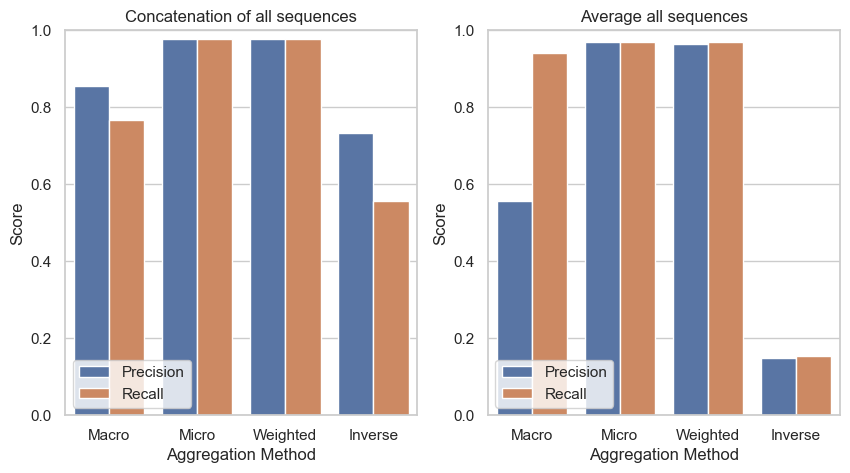

In [52]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

colors = ['red', 'blue', 'green', 'orange']

# single sequence
_df = pd.DataFrame(SCORES_single_sequence, columns=['Precision', 'Recall'])
_df['Aggregation Method'] = ['Macro', 'Micro', 'Weighted', 'Inverse']
_df = _df.melt(id_vars=['Aggregation Method'], var_name='Metric', value_name='value')

sns.barplot(
    data=_df,
    x='Aggregation Method',
    y='value',
    hue='Metric',
    ax=ax[0],
    # palette="Set2"
)
ax[0].set_ylim(0, 1)
ax[0].legend(loc='lower left')
ax[0].set_xlabel('Aggregation Method')
ax[0].set_ylabel('Score')
ax[0].set_title('Concatenation of all sequences')

# single sequence
_df = pd.DataFrame(SCORES_average, columns=['Precision', 'Recall'])
_df['Aggregation Method'] = ['Macro', 'Micro', 'Weighted', 'Inverse']
_df = _df.melt(id_vars=['Aggregation Method'], var_name='Metric', value_name='value')

sns.barplot(
    data=_df,
    x='Aggregation Method',
    y='value',
    hue='Metric',
    ax=ax[1],
    # palette="Set2"
)
ax[1].set_ylim(0, 1)
ax[1].legend(loc='lower left')
ax[1].set_xlabel('Aggregation Method')
ax[1].set_ylabel('Score')
ax[1].set_title('Average all sequences')


In [ ]:
# def precision_recall_dataframe(_df: pd.DataFrame, aggregation_method: str, weight: Optional[str] = None) -> Tuple[float, float, float, float]:
#     """
#     Returns the average precision and the standard deviation

#     aggregation_method: str  
#         - 'micro': Compute the average precision accross all sequences jointly
#         - 'macro': Compute the average precision for each sequence, then average accross all sequences

#     weight: Optional[str]
#         - None: No weighting
#         - 'weighted': Weight each predicted class by its observed frequency in the ground truth
#         - 'inverse': Same as 'weighted', except that the weights are mirrored. Hence, classes that are rarely observed are weighted more. 

#     Returns:
#         - average precision: float
#         - std precision: float
#         - average recall: float
#         - std recall: float

#     """

#     weights = None

#     unique_values = defaultdict(int)
#     for i, (test_sequence, test_annotation) in tqdm(_df.iterrows(), total=len(_df), desc="Computing the weight of each symbol"):
#         for v in test_annotation:
#             unique_values[v] += 1
#     match weight:
#         case None | 'None':
#             pass
#         case 'weighted' | 'inverse':
#             sum_weights = sum(unique_values.values())
#             weights = {k: v / sum_weights for k, v in unique_values.items()}
#             if weight == 'inverse':
#                 weights = {k: 1.0 - v for k, v in weights.items()}
#         case _:
#             raise ValueError(f"Invalid weight: {weight}, expected one of: None, 'weighted', 'inverse' but got {weight}.")

#     unique_values = list(unique_values.keys())

#     match aggregation_method:
#         case 'micro':
#             # accross the entire sequence
#             ground_truths: List[int] = []
#             predictions: List[int] = []
            
#             for i, (test_sequence, test_annotation) in tqdm(_df.iterrows(), total=len(_df), desc="Computing average precision"):
#                 test_annotation = np.array(test_annotation)
#                 _, pred_seq = viterbi_max_x([alphabet_mapping[c] for c in test_sequence], MC_HMM)
#                 assert len(pred_seq) > 0

#                 predictions.extend(pred_seq)
#                 ground_truths.extend(test_annotation.tolist())
            
#             ground_truths = np.array(ground_truths)
#             predictions = np.array(predictions)

#             TP, FP, TN, FN = scores(predictions, ground_truths, unique_values)
#             TP = np.array(TP, dtype=float)
#             FP = np.array(FP, dtype=float)
#             FN = np.array(FN, dtype=float)
            
#             if weights is not None:
#                 TP_sum = 0.0
#                 FP_sum = 0.0
#                 FN_sum = 0.0
#                 # for i, (k, v) in enumerate(weights.items()):
#                 for i, k in enumerate(unique_values):
#                     v = weights[k]
#                     TP_sum += TP[i] * v
#                     FP_sum += FP[i] * v
#                     FN_sum += FN[i] * v
#                 TP = TP_sum
#                 FP = FP_sum
#                 FN = FN_sum
#             else:
#                 TP = TP.sum()
#                 FP = FP.sum()
#                 FN = FN.sum()

#             denom = TP + FP
#             if denom == 0:
#                 precision, precision_std = 0.0, 0.0
#             precision, precision_std = float(TP / denom), 0.0   

#             denom = TP + FN
#             if denom == 0:
#                 recall, recall_std = 0.0, 0.0
#             recall, recall_std = float(TP / denom), 0.0

#             return precision, precision_std, recall, recall_std
            
#         case 'macro':
#             precisions = []
#             recalls = []
#             for i, (test_sequence, test_annotation) in tqdm(_df.iterrows(), total=len(_df), desc="Computing average precision"):
#                 test_annotation = np.array(test_annotation)
#                 _, pred_seq = viterbi_max_x([alphabet_mapping[c] for c in test_sequence], MC_HMM)
#                 assert len(pred_seq) > 0

#                 TP, FP, TN, FN = scores(pred_seq, test_annotation, unique_values)
#                 # print(pred_seq, test_annotation)
#                 # print('Unique values:', unique_values)
#                 # print('TP:', TP)
#                 # print(test_annotation)
#                 # print(pred_seq)

#                 # break
                
#                 TP = np.array(TP, dtype=float)
#                 FP = np.array(FP, dtype=float)
#                 FN = np.array(FN, dtype=float)
                
#                 if weights is not None:
#                     TP_sum = 0.0
#                     FP_sum = 0.0
#                     FN_sum = 0.0
#                     for i, k in enumerate(unique_values):
#                         v = weights[k]
#                         TP_sum += TP[i] * v
#                         FP_sum += FP[i] * v
#                         FN_sum += FN[i] * v
#                     TP = TP_sum
#                     FP = FP_sum
#                     FN = FN_sum
#                 else:
#                     TP = TP.sum()
#                     FP = FP.sum()
#                     FN = FN.sum()

#                 denom = TP + FP
#                 if denom == 0:
#                     precisions.append(0.0)
#                 else:
#                     precisions.append(float(TP / denom))

#                 denom = TP + FN
#                 if denom == 0:
#                     recalls.append(0.0)
#                 else:
#                     recalls.append(float(TP / denom))

#             return np.mean(precisions).item(), np.std(precisions).item(), np.mean(recalls).item(), np.std(recalls).item()

#         case _:
#             raise ValueError(f"Invalid aggregation method: {aggregation_method}. Expected one of: 'micro', 'macro', but got {aggregation_method}.")

Computing average precision: 100%|██████████| 100/100 [00:01<00:00, 76.03it/s]


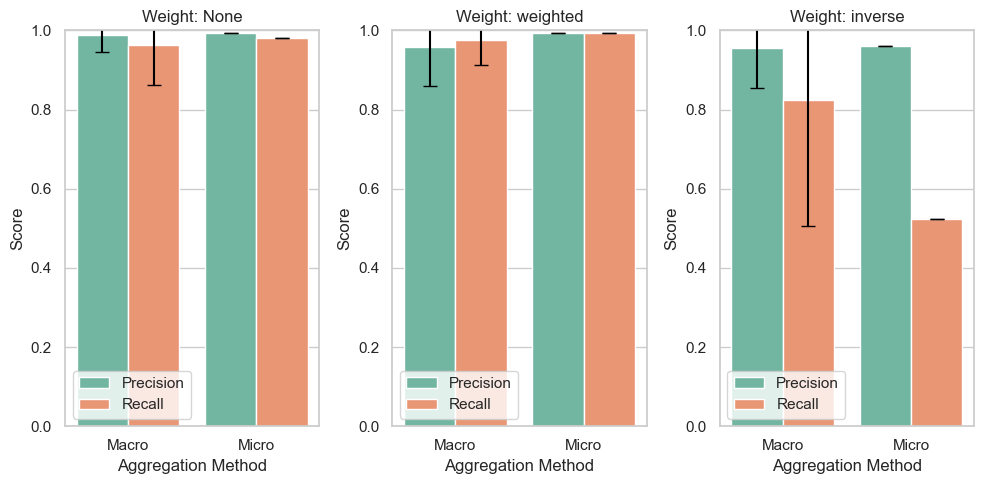

In [ ]:
# # compute the precisions and recalls
# # ! The code for the plotting is mostly generated by a generative AI. As it is not a crutial part of the assignment, but rather a visualization of the previous results, I decided to quickly plot the results using AI
# # ! I still changed some parts as it did not work as intended out of the box.

# fig, ax = plt.subplots(1,3, figsize=(10, 5))

# WEIGHT_VALUES = ['None', 'weighted', 'inverse']
# for wid, weight in enumerate(WEIGHT_VALUES):
#     # precision_macro, precision_std_macro, recall_macro, recall_std_macro = precision_recall_dataframe(df_test, 'macro', weight)
#     # precision_micro, precision_std_micro, recall_micro, recall_std_micro = precision_recall_dataframe(df_test, 'micro', weight)
#     precision_macro, precision_std_macro, recall_macro, recall_std_macro = precision_recall_dataframe(df_test.sample(100), 'macro', weight)
#     precision_micro, precision_std_micro, recall_micro, recall_std_micro = precision_recall_dataframe(df_test.sample(100), 'micro', weight)

#     # Prepare mean and std arrays for plotting
#     agg_methods = ["Macro", "Macro", "Micro", "Micro"]
#     metrics = ["Precision", "Recall"] * 2
#     means = [precision_macro, recall_macro, precision_micro, recall_micro]
#     # stds = [precision_std_macro, recall_std_macro, precision_std_micro, recall_std_micro]
#     stds = [precision_std_macro, precision_std_micro, recall_std_macro, recall_std_micro]
#     # stds = [0.1, 0.2,]

#     # Make a tidy DataFrame
#     df_metric = pd.DataFrame({
#         "Aggregation Method": agg_methods,
#         "Metric": metrics,
#         "Mean": means,
#         "Std": stds,
#         "Weight": [weight]*4,
#     })

#     # Plot barplot for means only, keep dodge and order consistent with errorbar overlay
#     bar = sns.barplot(
#         data=df_metric,
#         x="Aggregation Method",
#         y="Mean",
#         hue="Metric",
#         ax=ax[wid],
#         palette="Set2",
#         errorbar=None,
#         dodge=True
#     )

#     # Now add error bars. We'll map these manually:
#     # Need to match bars and stds: bar.patches are in the same plotting order as our df_metric rows.
#     for i, (patch, std) in enumerate(zip(ax[wid].patches, df_metric["Std"])):
#         # Bars plot in group order, then hue - matches row order.
#         x = patch.get_x() + patch.get_width()/2
#         y = patch.get_height()
#         ax[wid].errorbar(
#             x=x,
#             y=y,
#             yerr=std,
#             color='black',
#             capsize=5,
#             fmt='none',
#             lw=1.5,
#         )

#     ax[wid].set_title(f"Weight: {weight}")
#     ax[wid].set_ylim(0, 1)
#     ax[wid].set_ylabel("Score")
#     ax[wid].set_xlabel("Aggregation Method")

#     ax[wid].legend(loc='lower left')

# plt.tight_layout()
# plt.show()
        

**Evaluation**

*Idea*:

We compute the precision and recall of the Hidden Markov Model.
To this end, as we have relatively few data, we compute the precision and recall by (1) concatenating all sequences together and treating the concatenation as a single sequece and (2) by computing the precision and recall for each sequence and then averaging the precision and recalls.

By computing the precision and recall metrics in the two settings, we can evaluate better the hidden Markov model, as the precision and recall of the concatenation of all sequence will indicate the precision and recall in the total count, i.e., out of all the predictions, how many are correct. 
On the other hand, by averaging the precision and recall across all sequences, each individual sequence is evaluated by how good the sequence itself is being predicted. 

Furthermore, the precision and recall metrics are computed in four different settings:
- Macro: This would be the accuracy of the predicted sequence to the ground truth
- Micro: In this setting, the TP, FP, and FN rates are computed for each symbol individually (in our case, for each of the two states), and then averaged together.
- Weighted: This setting extends the Micro setting by multiplying the computed precision and recall by the probability of observing each symbol (state). 
- Inverse: This setting is there to counteract the inbalance in the labels as there are only a very small fraction of 1s compared to 0s in the ground truth. To this end, we compute the overall precision and recall like in the weighted case, but we inverse the probabilities, i.e. $p \Rightarrow 1 - p$. 

*Results*

We observe that the Precision and recall for both settings are roughtly the same. We hypothesize this phenomenon from the observation that the precision and recall values for the micro and weighted settings are almost equal, which indicates that the hidden Markov Model predicts mostly 0s. 

The inverse setting is the most interesting case, as we observe that, by weighting the predictions of 1s heigher than the predictions of 0s, the precision and recall drastically drops compared to the other settings.

Furthermore, by averaging accross all sequences instead of computing the precision and recall from the concatenation of all sequences, we observe that the precision and recalls drop drastically to (0.05, 0.05), compared to (0.33, 0.26) when considering the concatenation.

This is a clear indication that the hidden Markov model performs well in some cases, but is very bad in most cases.  

### (c)

In [53]:
# we need to change our data
def update_dataframe(df: pd.DataFrame, k: int) -> pd.DataFrame:

    def update_sequence(sequence: List[int], k: int) -> List[int]:
        consequtive_ones = 0

        seq = []
        for i, s in enumerate(sequence):
            if s == 1:
                consequtive_ones += 1
                if consequtive_ones >= k+1:
                    consequtive_ones = 1
                    seq.append(1)
                else:
                    seq.append(consequtive_ones)

            else:
                consequtive_ones = 0
                seq.append(s)

        return seq

    df['annotations'] = df['annotations'].apply(lambda x: update_sequence(x, k))
    return df

k = 3
df_test_k = update_dataframe(df_test.copy(), k)
df_train_k = update_dataframe(df_train.copy(), k)
df_test_k

,sequence,annotations
14767,"[12, 16, 5, 21, 11, 18, 22, 21, 5, 11, 21, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14768,"[12, 15, 21, 16, 0, 15, 16, 22, 19, 3, 5, 11, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14769,"[12, 4, 19, 0, 15, 10, 15, 6, 10, 3, 21, 15, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14770,"[12, 4, 11, 13, 18, 11, 11, 8, 11, 11, 4, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14771,"[12, 0, 6, 15, 11, 22, 17, 19, 0, 0, 5, 21, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
18454,"[12, 18, 17, 17, 19, 17, 2, 4, 3, 11, 3, 4, 11...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18455,"[12, 0, 6, 15, 6, 21, 15, 6, 0, 15, 0, 0, 17, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18456,"[12, 0, 15, 16, 10, 7, 6, 6, 6, 6, 6, 6, 6, 18...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18457,"[12, 0, 3, 15, 17, 3, 10, 0, 11, 16, 3, 24, 17...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [56]:
# train the new HMM
MC_HMM = MonteCarloHDD(num_hidden_states=k+1, num_observed_states=21)

for index, row in tqdm(df_train_k.iterrows(), total=len(df_train_k), desc="Estimating the parameters of the Hidden Markov Model"):
    MC_HMM.reset_sequence()
    
    for step in range(len(row['sequence'])):
        # print(row['sequence'][step], row['annotations'][step])
        MC_HMM.learn_step(observed_state=alphabet_mapping[row['sequence'][step]], hidden_state=row['annotations'][step])

MC_HMM.formalize_probabilities()

Estimating the parameters of the Hidden Markov Model: 100%|██████████| 14767/14767 [00:09<00:00, 1477.93it/s]


In [57]:
MC_HMM.transition_matrix, MC_HMM.emission_matrix, MC_HMM.pi


(array([[0.99832151, 0.00167849, 0.        , 0.        ],
        [0.01425197, 0.        , 0.98574803, 0.        ],
        [0.01895041, 0.        , 0.        , 0.98104959],
        [0.10788484, 0.89211516, 0.        , 0.        ]]),
 array([[6.92669017e-02, 2.23936979e-02, 4.92535073e-02, 7.39929258e-02,
         3.40816938e-02, 6.58905677e-02, 2.67159356e-02, 4.09576305e-02,
         5.92171870e-02, 9.53739645e-02, 2.05869616e-02, 3.65882784e-02,
         6.45684715e-02, 4.90439625e-02, 5.81043945e-02, 8.45869269e-02,
         5.38760242e-02, 2.40994575e-06, 5.75039565e-02, 1.17032990e-02,
         2.62913032e-02],
        [9.58678013e-02, 2.62697542e-02, 8.70716834e-03, 9.86351192e-03,
         9.30016505e-02, 7.01910438e-02, 9.88327848e-03, 1.00176911e-01,
         8.43043654e-03, 1.94947668e-01, 3.21997213e-02, 1.68411065e-02,
         2.67046185e-02, 1.19291171e-02, 8.90483391e-03, 5.97839515e-02,
         4.90012947e-02, 0.00000000e+00, 1.17235449e-01, 2.32948874e-02,
         3

Estimating the parameters of the Hidden Markov Model: 100%|██████████| 14767/14767 [00:10<00:00, 1430.04it/s]
Computing average precision and recall: 100%|██████████| 3692/3692 [00:06<00:00, 572.45it/s]
/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_51061/1670285024.py:63: RuntimeWarning: invalid value encountered in divide
  class_precisions = np.where((TP + FP) > 0, TP / (TP + FP), 0.0)
Computing average precision and recall: 100%|██████████| 3692/3692 [00:06<00:00, 551.40it/s]


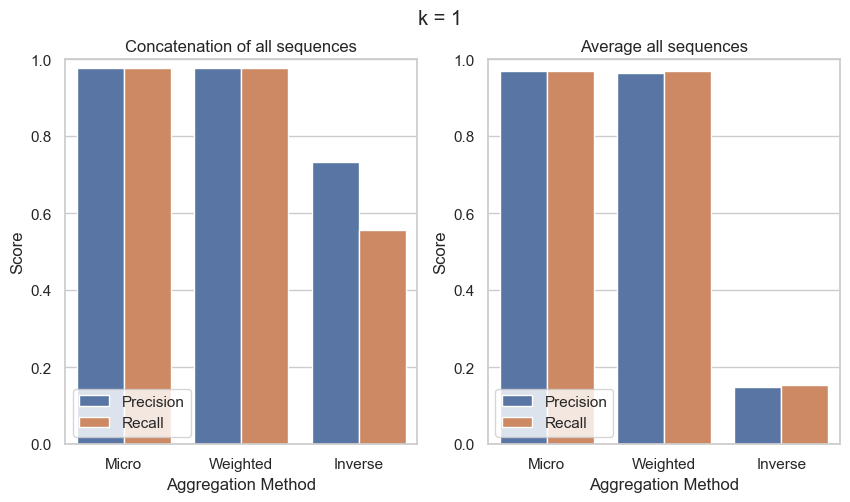

Estimating the parameters of the Hidden Markov Model: 100%|██████████| 14767/14767 [00:10<00:00, 1440.71it/s]
Computing average precision and recall: 100%|██████████| 3692/3692 [00:16<00:00, 229.01it/s]
/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_51061/1670285024.py:63: RuntimeWarning: invalid value encountered in divide
  class_precisions = np.where((TP + FP) > 0, TP / (TP + FP), 0.0)
Computing average precision and recall: 100%|██████████| 3692/3692 [00:16<00:00, 224.39it/s]


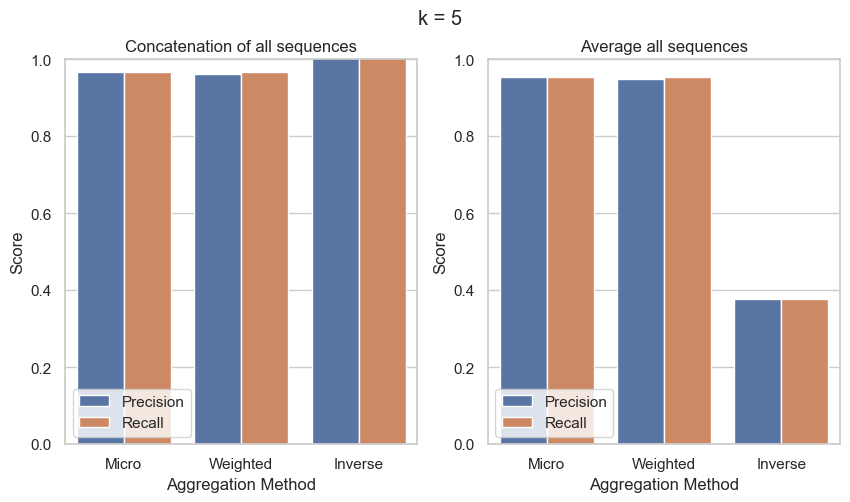

Estimating the parameters of the Hidden Markov Model: 100%|██████████| 14767/14767 [00:10<00:00, 1452.73it/s]
Computing average precision and recall: 100%|██████████| 3692/3692 [00:38<00:00, 96.44it/s] 
/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_51061/1670285024.py:63: RuntimeWarning: invalid value encountered in divide
  class_precisions = np.where((TP + FP) > 0, TP / (TP + FP), 0.0)
Computing average precision and recall: 100%|██████████| 3692/3692 [00:38<00:00, 95.61it/s] 


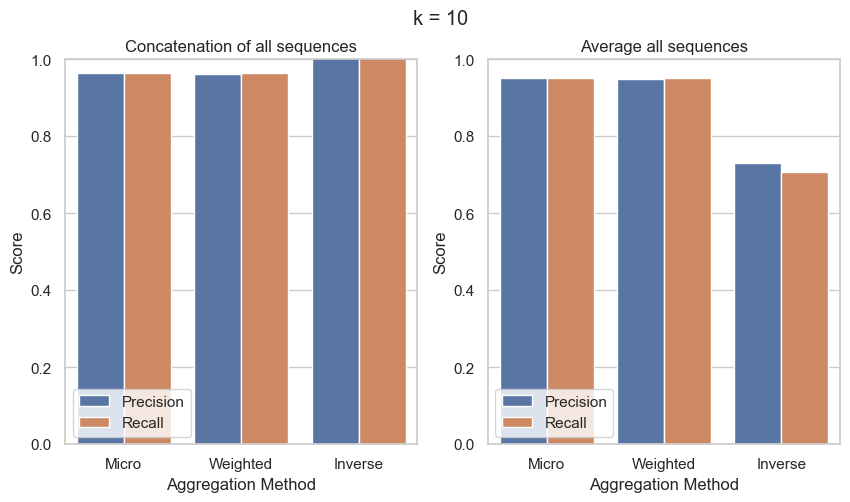

Estimating the parameters of the Hidden Markov Model: 100%|██████████| 14767/14767 [00:10<00:00, 1448.47it/s]
Computing average precision and recall: 100%|██████████| 3692/3692 [02:00<00:00, 30.70it/s]
/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_51061/1670285024.py:63: RuntimeWarning: invalid value encountered in divide
  class_precisions = np.where((TP + FP) > 0, TP / (TP + FP), 0.0)
Computing average precision and recall: 100%|██████████| 3692/3692 [02:00<00:00, 30.54it/s]


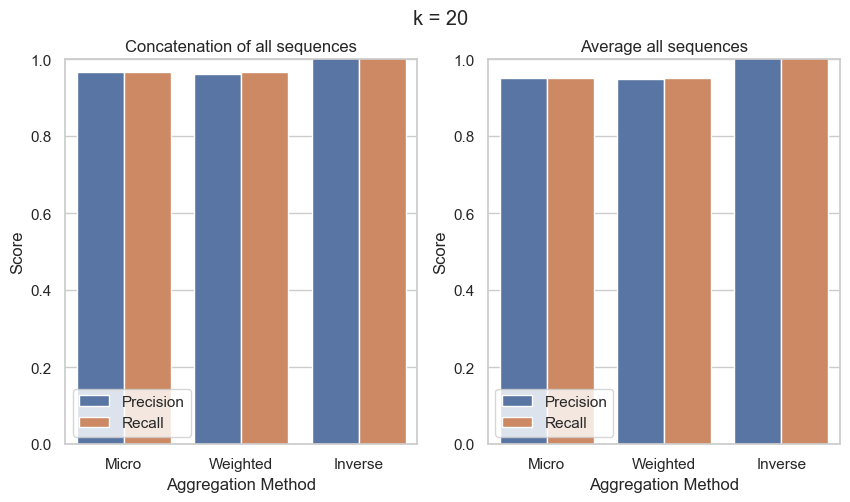

Estimating the parameters of the Hidden Markov Model: 100%|██████████| 14767/14767 [00:10<00:00, 1437.60it/s]
Computing average precision and recall: 100%|██████████| 3692/3692 [04:11<00:00, 14.69it/s]
/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_51061/1670285024.py:63: RuntimeWarning: invalid value encountered in divide
  class_precisions = np.where((TP + FP) > 0, TP / (TP + FP), 0.0)
Computing average precision and recall: 100%|██████████| 3692/3692 [04:11<00:00, 14.66it/s]


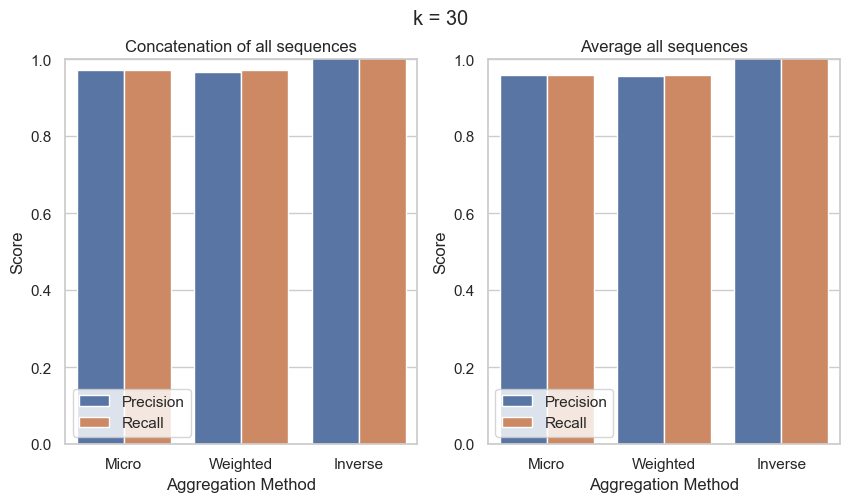

In [62]:
Ks = [1, 5, 10, 20, 30]
aggregation_methods = ['micro', 'weighted', 'weighted_inverse']

for k in Ks:

    df_test_k = update_dataframe(df_test.copy(), k)
    df_train_k = update_dataframe(df_train.copy(), k)
    df_test_k

    # train the new HMM
    MC_HMM = MonteCarloHDD(num_hidden_states=k+1, num_observed_states=21)

    for index, row in tqdm(df_train_k.iterrows(), total=len(df_train_k), desc="Estimating the parameters of the Hidden Markov Model"):
        MC_HMM.reset_sequence()
        
        for step in range(len(row['sequence'])):
            # print(row['sequence'][step], row['annotations'][step])
            MC_HMM.learn_step(observed_state=alphabet_mapping[row['sequence'][step]], hidden_state=row['annotations'][step])

        

    MC_HMM.formalize_probabilities()


    SCORES_average = compute_average_precision_recall_average(df_test_k, aggregation_methods)
    SCORES_average

    SCORES_single_sequence = compute_average_precision_recall_single_sequence(df_test_k, aggregation_methods)
    SCORES_single_sequence

    # plot
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    colors = ['red', 'blue', 'green', 'orange']

    # single sequence
    _df = pd.DataFrame(SCORES_single_sequence, columns=['Precision', 'Recall'])
    _df['Aggregation Method'] = ['Micro', 'Weighted', 'Inverse']
    _df = _df.melt(id_vars=['Aggregation Method'], var_name='Metric', value_name='value')

    sns.barplot(
        data=_df,
        x='Aggregation Method',
        y='value',
        hue='Metric',
        ax=ax[0],
        # palette="Set2"
    )
    ax[0].set_ylim(0, 1)
    ax[0].legend(loc='lower left')
    ax[0].set_xlabel('Aggregation Method')
    ax[0].set_ylabel('Score')
    ax[0].set_title('Concatenation of all sequences')

    # single sequence
    _df = pd.DataFrame(SCORES_average, columns=['Precision', 'Recall'])
    _df['Aggregation Method'] = ['Micro', 'Weighted', 'Inverse']
    _df = _df.melt(id_vars=['Aggregation Method'], var_name='Metric', value_name='value')

    sns.barplot(
        data=_df,
        x='Aggregation Method',
        y='value',
        hue='Metric',
        ax=ax[1],
        # palette="Set2"
    )
    ax[1].set_ylim(0, 1)
    ax[1].legend(loc='lower left')
    ax[1].set_xlabel('Aggregation Method')
    ax[1].set_ylabel('Score')
    ax[1].set_title('Average all sequences')
    fig.suptitle(f'k = {k}')
    plt.show()

# Problem 4

### (a)

In [24]:
df = pd.read_csv('./burst_counts.csv')
df

,t,counts
0,0.0,4
1,0.5,3
2,1.0,3
3,1.5,2
4,2.0,1
...,...,...
395,197.5,4
396,198.0,4
397,198.5,0
398,199.0,2


In [25]:
def denoise(seq: List[int]) -> List[int]:

    new_seq = [seq[0]]
    for i in range(1, len(seq)-1):
        if seq[i] > seq[i-1] and seq[i] > seq[i+1]:
            new_seq.append(int((seq[i-1] + seq[i+1]) / 2))
        else:
            new_seq.append(seq[i])
    new_seq.append(seq[-1])

    return new_seq

df['counts_denoised'] = denoise(df['counts'].values)
for i in range(100):
    df['counts_denoised'] = denoise(df['counts_denoised'].values)


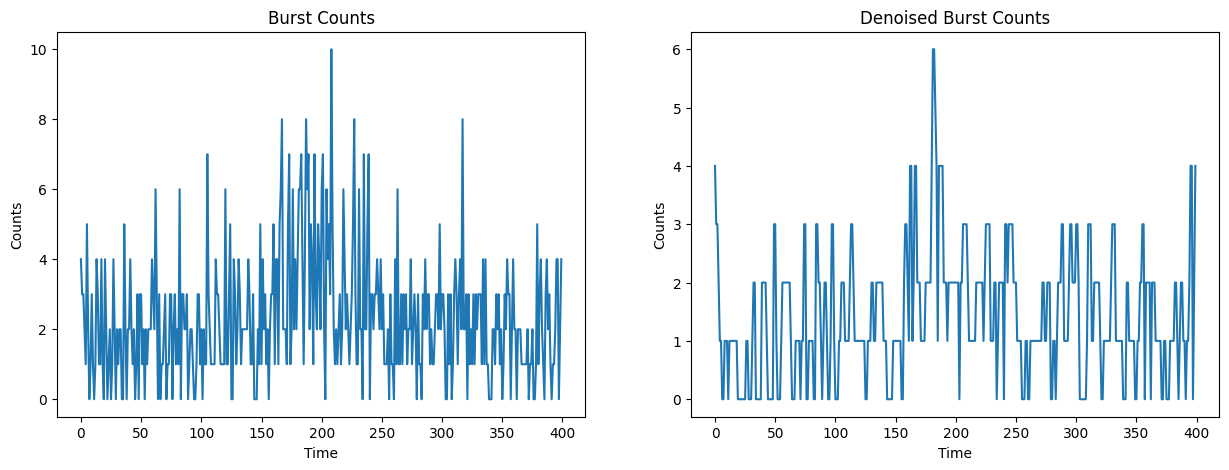

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df['counts'])
# ax[0].axhline(y=average_value, color='r', linestyle='--', label='Average Value')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Counts')
# ax[0].legend()
ax[0].set_title('Burst Counts')

ax[1].plot(df['counts_denoised'])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Counts')
# ax[1].legend()
ax[1].set_title('Denoised Burst Counts')
plt.show()


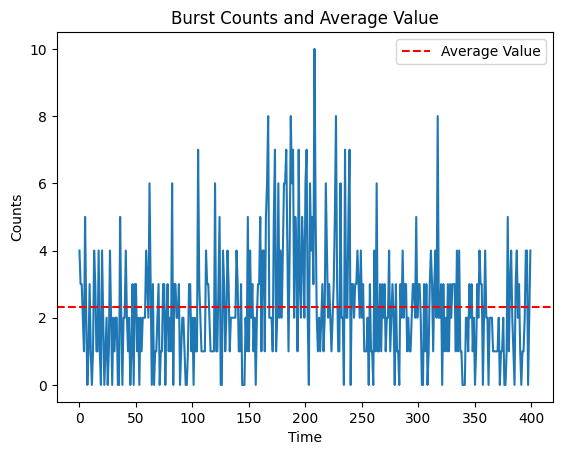

In [27]:
average_value = df['counts'].mean()
plt.plot(df['counts'])
plt.axhline(y=average_value, color='r', linestyle='--', label='Average Value')
# plt.plot(df['t'], average_value * np.ones(len(df['t'])), label='Average Value', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.title('Burst Counts and Average Value')
plt.show()


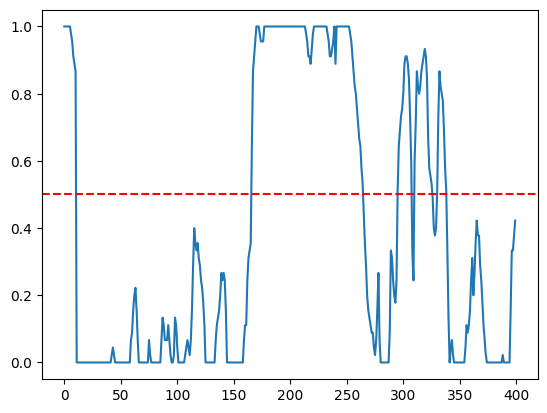

(166, 264)

In [28]:
# probability of being above average
counts_above_average = np.zeros(len(df['counts_denoised']))

K_upper = 50
K_lower = 5
average_value = df['counts_denoised'].mean()
for k in range(K_lower, K_upper):
    window_size = k  # You can change the window size as desired
    running_avg = df['counts_denoised'].rolling(window=window_size, min_periods=1).mean()

    counts_above_average[running_avg > average_value] += 1


counts_above_average = counts_above_average / (K_upper - K_lower)

plt.plot(counts_above_average)
plt.axhline(y=0.5, color='r', linestyle='--', label='Average Value')
plt.show()

# get largest window size
points_above_average = np.where(counts_above_average > 0.5)[0]
# print(points_above_average)

# group sequential points together
groups = []
group_start = points_above_average[0].item()
group_length = 0
for i in range(1, len(points_above_average)):
    if points_above_average[i] == points_above_average[i-1] + 1:
        group_length += 1
    
    else:
        groups.append((group_start, group_start+group_length))
        group_start = points_above_average[i].item()
        group_length = 0

# sort the groups w.r.t. group[1] - group[0]
groups.sort(key=lambda x: x[1] - x[0], reverse=True)

# get the largest group
largest_group = groups[0]
largest_group


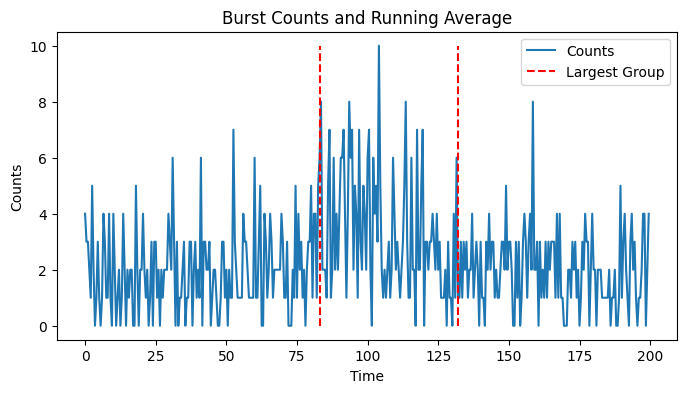

In [29]:
window_size = 15  # You can change the window size as desired
running_avg = df['counts_denoised'].rolling(window=window_size, min_periods=1).mean()

# Gaussian smoothing
# alpha = 0.1
# smoothed_counts = np.convolve(running_avg, np.ones(window_size)/window_size, mode='valid')

average_value = df['counts'].mean()
average_value = df['counts_denoised'].mean()


plt.figure(figsize=(8,4))
plt.plot(df['t'], df['counts'], label='Counts')
# plt.plot(df['t'], running_avg, label=f'Running Avg (window={window_size})', linewidth=2)
# plt.plot(df['t'], smoothed_counts, label=f'Gaussian Smoothing (alpha={alpha})', linewidth=2)
plt.xlabel('Time')
# plt.axhline(y=average_value, color='r', linestyle='--', label='Average Value')
plt.vlines(x=largest_group[1]//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--')
plt.vlines(x=largest_group[0]//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--', label='Largest Group')
plt.ylabel('Counts')
plt.legend()
plt.title('Burst Counts and Running Average')
plt.show()


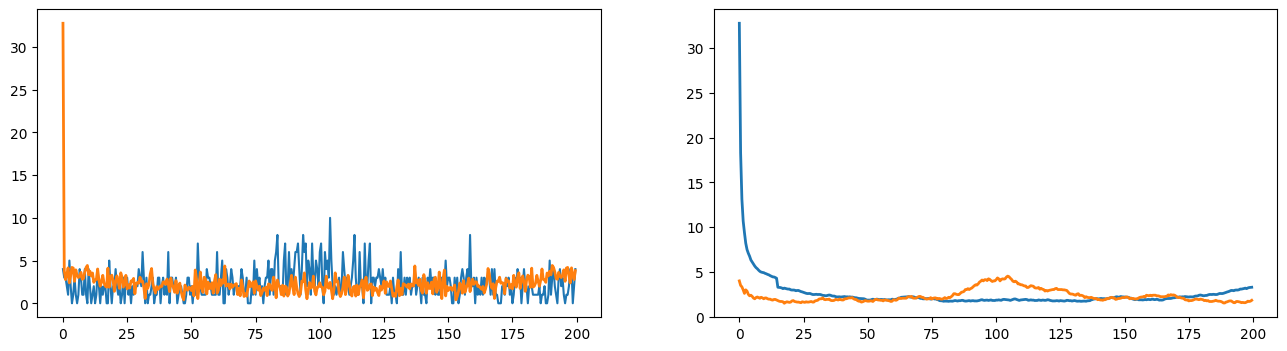

In [30]:
# trying phase-shift for denoising

import numpy as np

# Get counts
counts = df['counts'].values

# Compute FFT
counts_fft = np.fft.fft(counts)

# Zero out phases (keep only magnitudes)
magnitude = np.abs(counts_fft)
phase = np.angle(counts_fft)
zero_phase_fft = magnitude * np.exp(1j * 0)

smoothed_counts = np.fft.ifft(zero_phase_fft).real

df['zero_phase_smoothed'] = smoothed_counts

running_avg = df['zero_phase_smoothed'].rolling(window=30, min_periods=1).mean()
running_avg_original = df['counts'].rolling(window=30, min_periods=1).mean()

fig, ax = plt.subplots(1, 2, figsize=(16,4))
ax[0].plot(df['t'], counts, label='Original')
ax[0].plot(df['t'], smoothed_counts, label='Zero-phase Smoothed', linewidth=2)
ax[1].plot(df['t'], running_avg, label='Running Average Zero-phase Smoothed', linewidth=2)
ax[1].plot(df['t'], running_avg_original, label='Running Average Original', linewidth=2)
plt.show()


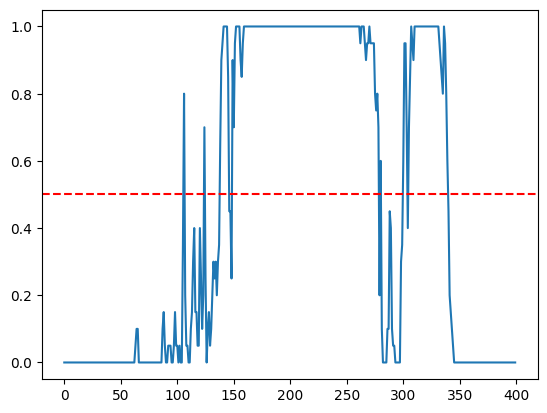

(149, 278)

In [31]:
# probability of being above average
# df['zero_phase_smoothed'] = smoothed_counts

counts_above_average = np.zeros(len(df['counts_denoised']))

epsilon = 0.1
K_upper = 35
K_lower = 15
# average_value = df['counts'].mean()
for k in range(K_lower, K_upper):
    window_size = k  # You can change the window size as desired
    running_avg_original = df['counts'].rolling(window=window_size, min_periods=1).mean()
    running_avg = df['zero_phase_smoothed'].rolling(window=window_size, min_periods=1).mean()

    counts_above_average[running_avg < running_avg_original] += 1


counts_above_average = counts_above_average / (K_upper - K_lower)

plt.plot(counts_above_average)
plt.axhline(y=0.5, color='r', linestyle='--', label='Average Value')
plt.show()

# get largest window size
points_above_average = np.where(counts_above_average > 0.5)[0]
# print(points_above_average)

# group sequential points together
groups = []
group_start = points_above_average[0].item()
group_length = 0
for i in range(1, len(points_above_average)):
    if points_above_average[i] == points_above_average[i-1] + 1:
        group_length += 1
    
    else:
        groups.append((group_start, group_start+group_length))
        group_start = points_above_average[i].item()
        group_length = 0

# sort the groups w.r.t. group[1] - group[0]
groups.sort(key=lambda x: x[1] - x[0], reverse=True)

# get the largest group
largest_group = groups[0]
largest_group


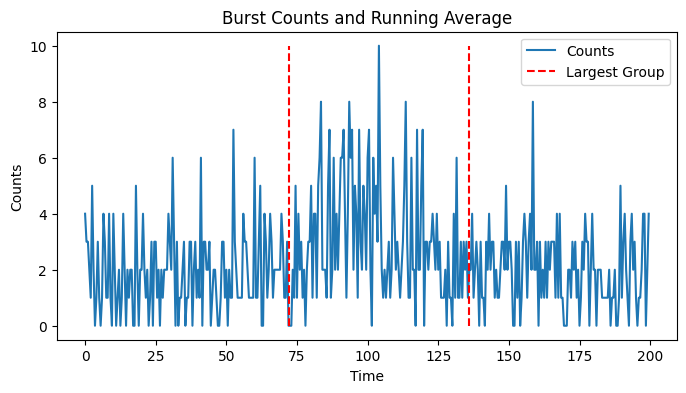

In [32]:
window_size = 15  # You can change the window size as desired
running_avg = df['counts_denoised'].rolling(window=window_size, min_periods=1).mean()

# Gaussian smoothing
# alpha = 0.1
# smoothed_counts = np.convolve(running_avg, np.ones(window_size)/window_size, mode='valid')

average_value = df['counts'].mean()
average_value = df['counts_denoised'].mean()


plt.figure(figsize=(8,4))
plt.plot(df['t'], df['counts'], label='Counts')
plt.xlabel('Time')
plt.vlines(x=(largest_group[1]-5)//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--')
plt.vlines(x=(largest_group[0]-5)//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--', label='Largest Group')
plt.ylabel('Counts')
plt.legend()
plt.title('Burst Counts and Running Average')
plt.show()


In [33]:
from bayesDenoise import denoise_wavelet_1d

In [34]:
df['bayes_denoised'] = denoise_wavelet_1d(df['counts'].values, method='BayesShrink', wavelet='db1', mode='hard')

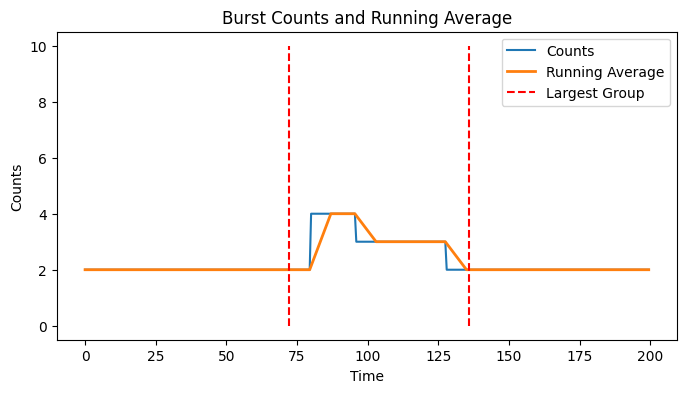

In [35]:
window_size = 15  # You can change the window size as desired
running_avg = df['bayes_denoised'].rolling(window=window_size, min_periods=1).mean()
average_value = df['counts'].mean()
average_value = df['counts_denoised'].mean()


plt.figure(figsize=(8,4))
plt.plot(df['t'], df['bayes_denoised'], label='Counts')
plt.xlabel('Time')
plt.plot(df['t'], running_avg, label='Running Average', linewidth=2)
plt.vlines(x=(largest_group[1]-5)//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--')
plt.vlines(x=(largest_group[0]-5)//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--', label='Largest Group')
plt.ylabel('Counts')
plt.legend()
plt.title('Burst Counts and Running Average')
plt.show()


### (b) MLE Estimation 
Using newtons method

In [53]:
L = -1
R = -1
T = -1

def log_likelihood(_lambda):
    # lambda_1, lambda_2 = _lambda
    output = 0
    for i in range(L):
        output += -_lambda[0] + df['counts'][i] * np.log(_lambda[0]) - np.log(math.factorial(df['counts'][i]))
        
    if R < T:
        for i in range(R, T):
            output += -_lambda[1] + df['counts'][i] * np.log(_lambda[1]) - np.log(math.factorial(df['counts'][i]))
            

    for i in range(L, R):
        output += -_lambda[1] + df['counts'][i] * np.log(_lambda[1]) - np.log(math.factorial(df['counts'][i]))
        

    return output

def gradient(_lambda):
    grad_lambda_1 = 0
    for i in range(L):
        grad_lambda_1 += -1 + df['counts'][i] / _lambda[0]
    if R < T:
        for i in range(R, T):
            grad_lambda_1 += -1 + df['counts'][i] / _lambda[0]
    
    grad_lambda_2 = 0
    for i in range(L, R):
        grad_lambda_2 += -1 + df['counts'][i] / _lambda[1]
        
    return np.array([grad_lambda_1, grad_lambda_2], dtype=float).flatten()

def hessian(_lambda):
    grad_lambda_1_squared = 0.0


    for i in range(L):
        grad_lambda_1_squared += - df['counts'][i] / (_lambda[0]**2)

    if R < T:
        for i in range(R, T):
            grad_lambda_1_squared += - df['counts'][i] / (_lambda[0]**2)

    grad_lambda_2_squared = 0.0
    for i in range(L, R):
        grad_lambda_2_squared += - df['counts'][i] / (_lambda[1]**2)

    return np.array([[grad_lambda_1_squared, 0.0], [0.0, grad_lambda_2_squared]], dtype=float)

In [49]:
from scipy import optimize
import numpy as np

In [54]:
L = largest_group[0]-5
R = largest_group[1]-5
T = len(df['counts'])

L, R, T

(144, 273, 400)

In [68]:
class LogLikelihood(torch.nn.Module):
    def __init__(self, L, R, T):
        super(LogLikelihood, self).__init__()
        self.L = L
        self.R = R
        self.T = T

    def forward(self, Lambda1, Lambda2):
        output = 0.0
        for i in range(self.L):
            output += -Lambda1 + df['counts'][i] * torch.log(Lambda1) - np.log(math.factorial(df['counts'][i]))
        
        if self.R < self.T:
            for i in range(self.R, self.T):
                output += -Lambda1 + df['counts'][i] * torch.log(Lambda1) - np.log(math.factorial(df['counts'][i]))
            
        for i in range(self.L, self.R):
            output += -Lambda2 + df['counts'][i] * torch.log(Lambda2) - np.log(math.factorial(df['counts'][i]))
            
        return output 

In [136]:
def gradient_log_likelihood(lamb_1, lamb_2, L, R, T) -> torch.tensor:
    grad_lambs = torch.tensor([0.0, 0.0], requires_grad=False)
    
    for i in range(L):
        # print(((df['counts'][i].item())/lamb_1).shape, lamb_1.shape)
        grad_lambs[0] += -1 + ((df['counts'][i].item())/lamb_1)

    for i in range(R, T):
        grad_lambs[0] += -1 + ((df['counts'][i].item())/lamb_1)

    for i in range(L, R):
        grad_lambs[1] += -1 + ((df['counts'][i].item())/lamb_2)

    return grad_lambs

#### Gradient Descent

Gradient Descent: 100%|██████████| 200/200 [00:02<00:00, 79.83it/s]


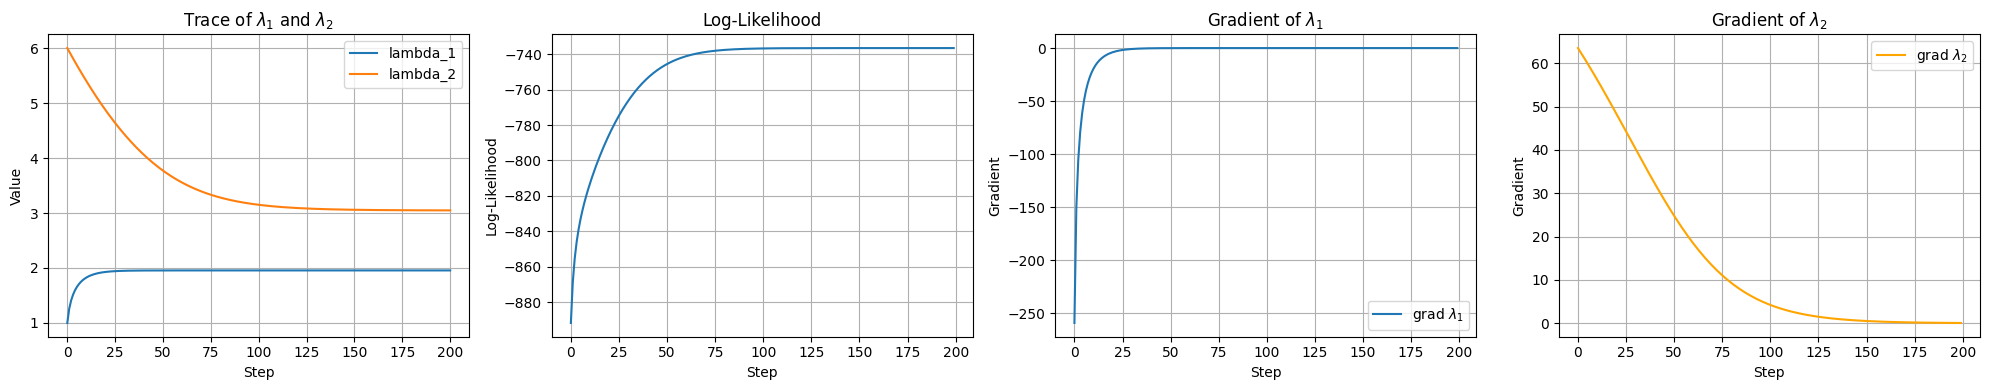

Converged to:
	Lambda 1: 1.955719232559204
	Lambda 2: 3.0479207038879395
	Log-Likelihood: -736.5333251953125


In [156]:
# gradient descent

lambda_1 = 1.0
lambda_2 = 6.0

lambda_1 = torch.tensor(lambda_1, requires_grad=True)
lambda_2 = torch.tensor(lambda_2, requires_grad=True)

optim = torch.optim.SGD([lambda_1, lambda_2], lr=1e-3)
optim.zero_grad()

f = LogLikelihood(L, R, T)

steps = 200

lambda_1_history = [lambda_1.item()]
lambda_2_history = [lambda_2.item()]
likelihood_history = []
gradient_history_lambda_1 = []
gradient_history_lambda_2 = []
for step in tqdm(range(steps), total=steps, desc='Gradient Descent'):
    optim.zero_grad()
    # print('Step:', step, 'Lambda1:', lambda_1.item(), 'Lambda2:', lambda_2.item())
    # output = gradient_log_likelihood(lambda_1, lambda_2, L, R, T)
    output = -f(lambda_1, lambda_2)
    output = output.sum()
    output.backward()
    optim.step()

    lambda_1_history.append(lambda_1.detach().item())
    lambda_2_history.append(lambda_2.detach().item())
    gradient_history_lambda_1.append(lambda_1.grad.item())
    gradient_history_lambda_2.append(lambda_2.grad.item())
    
    with torch.no_grad():
        likelihood = f(lambda_1, lambda_2)
        likelihood_history.append(likelihood.item())

fig, ax = plt.subplots(1, 4, figsize=(20,4))

# Plot lambda_1 and lambda_2 trace
ax[0].plot(lambda_1_history, label='lambda_1')
ax[0].plot(lambda_2_history, label='lambda_2')
ax[0].set_title('Trace of $\\lambda_1$ and $\\lambda_2$')
ax[0].set_xlabel('Step')
ax[0].set_ylabel('Value')
ax[0].legend()
ax[0].grid(True)

# Plot likelihood history
ax[1].plot(likelihood_history)
ax[1].set_title('Log-Likelihood')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Log-Likelihood')
ax[1].grid(True)

# Plot gradient history of lambda_1
ax[2].plot(gradient_history_lambda_1, label='grad $\\lambda_1$')
ax[2].set_title('Gradient of $\\lambda_1$')
ax[2].set_xlabel('Step')
ax[2].set_ylabel('Gradient')
ax[2].legend()
ax[2].grid(True)

# Plot gradient history of lambda_2
ax[3].plot(gradient_history_lambda_2, label='grad $\\lambda_2$', color='orange')
ax[3].set_title('Gradient of $\\lambda_2$')
ax[3].set_xlabel('Step')
ax[3].set_ylabel('Gradient')
ax[3].legend()
ax[3].grid(True)


plt.tight_layout()
plt.show()

print('Converged to:')
print('\tLambda 1:', lambda_1.item())
print('\tLambda 2:', lambda_2.item())
print('\tLog-Likelihood:', likelihood_history[-1])

#### Newtons Method

/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_55583/4115526386.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  output += -_lambda[0] + df['counts'][i] * np.log(_lambda[0]) - np.log(math.factorial(df['counts'][i]))
/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_55583/4115526386.py:13: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  output += -_lambda[1] + df['counts'][i] * np.log(_lambda[1]) - np.log(math.factorial(df['counts'][i]))
/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_55583/4115526386.py:17: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  output += -_lambda[1] + df['counts'][i] * np.log(_lambda[1]) - np.log(math.factorial(df['counts'][i]))


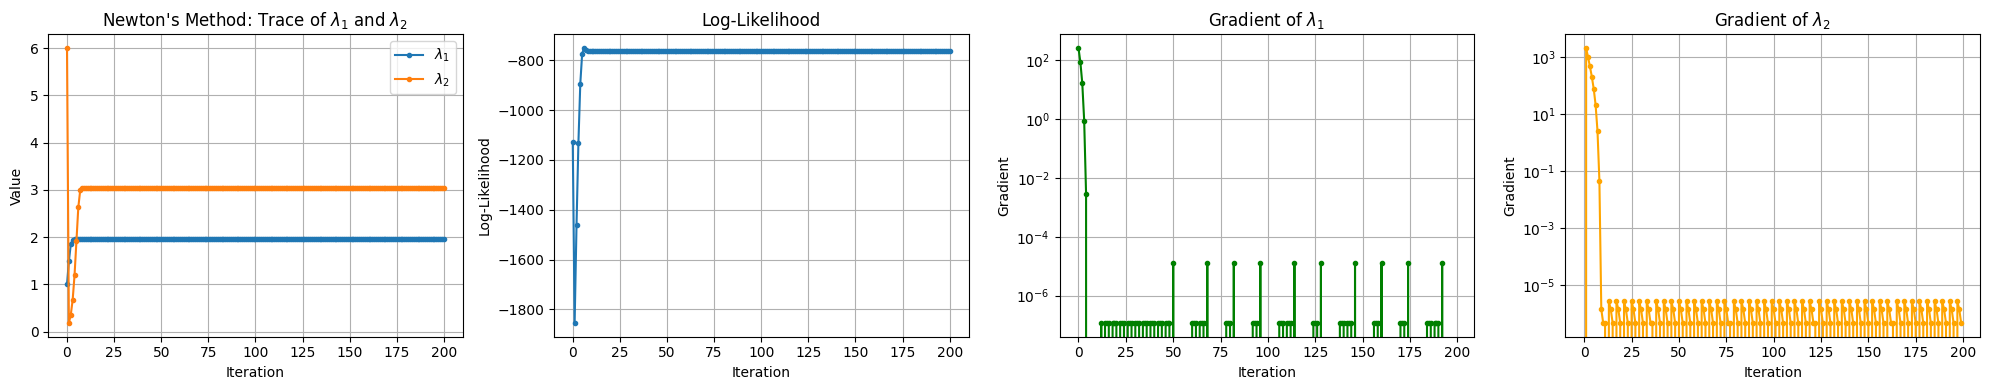

Newton's Method Results:
	λ₁ (background rate): 1.955720
	λ₂ (burst rate): 3.046511
	Log-Likelihood: -762.924707
	Iterations: 200


In [159]:
# Newton's Method for computing lambda1 and lambda2
def compute_hessian(lamb_1, lamb_2, L, R, T):
    h_11 = 0.0

    for i in range(L):
        h_11 += -df['counts'][i].item() * 1.0 / (lamb_1 ** 2)
    for i in range(R, T):
        h_11 += -df['counts'][i].item() * 1.0 / (lamb_1 ** 2)
    
    h_22 = 0.0
    for i in range(L, R):
        h_22 += -df['counts'][i].item() * 1.0 / (lamb_2 ** 2)
    
    return torch.tensor([[h_11, 0.0], [0.0, h_22]], dtype=float)

lambda_1_init = 1.0
lambda_2_init = 6.0

lambdas = torch.tensor([lambda_1_init, lambda_2_init], dtype=float, requires_grad=False)

max_iterations = 200
# tolerance = 1e-8

lambda_1_history = [lambdas[0]]
lambda_2_history = [lambdas[1]]
likelihood_history = [log_likelihood(lambdas)]
# gradient_norm_history = []
gradient_lambda_1_history = []
gradient_lambda_2_history = []

for iteration in range(max_iterations):
    grad = gradient_log_likelihood(lambdas[0], lambdas[1], L, R, T).float()
    H = compute_hessian(lambdas[0], lambdas[1], L, R, T).float()
    
    # gradient_norm_history.append(torch.linalg.norm(grad))
    gradient_lambda_1_history.append(grad[0])
    gradient_lambda_2_history.append(grad[1])
    
    H_inv = torch.tensor([[1.0/H[0,0], 0.0], [0.0, 1.0/H[1,1]]], dtype=float).float()
    delta = H_inv @ grad.float()

    lambdas = lambdas - delta
        
    lambda_1_history.append(lambdas[0])
    lambda_2_history.append(lambdas[1])
    likelihood_history.append(log_likelihood(lambdas))

# Plotting
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

# Plot lambda_1 and lambda_2 trace
ax[0].plot(lambda_1_history, label='$\\lambda_1$', marker='o', markersize=3)
ax[0].plot(lambda_2_history, label='$\\lambda_2$', marker='o', markersize=3)
ax[0].set_title("Newton's Method: Trace of $\\lambda_1$ and $\\lambda_2$")
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Value')
ax[0].legend()
ax[0].grid(True)

# Plot likelihood history
ax[1].plot(likelihood_history, marker='o', markersize=3)
ax[1].set_title('Log-Likelihood')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Log-Likelihood')
ax[1].grid(True)

# Plot gradient norm history
ax[2].plot(gradient_lambda_1_history, marker='o', markersize=3, color='green')
# ax[2].plot(gradient_lambda_2_history, marker='o', markersize=3, color='orange')
ax[2].set_title('Gradient of $\\lambda_1$')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('Gradient')
ax[2].set_yscale('log')
ax[2].grid(True)

# Plot gradient of lambda_2
ax[3].plot(gradient_lambda_2_history, marker='o', markersize=3, color='orange')
ax[3].set_title('Gradient of $\\lambda_2$')
ax[3].set_xlabel('Iteration')
ax[3].set_ylabel('Gradient')
ax[3].set_yscale('log')
ax[3].grid(True)

plt.tight_layout()
plt.show()

print("Newton's Method Results:")
print(f'\tλ₁ (background rate): {lambdas[0]:.6f}')
print(f'\tλ₂ (burst rate): {lambdas[1]:.6f}')
print(f'\tLog-Likelihood: {likelihood_history[-1]:.6f}')
print(f'\tIterations: {len(lambda_1_history) - 1}')
